## Dataset 1 - Amazon customer product reviews

Based on the Amazon customer product review datasets which are available at: https://s3.amazonaws.com/amazon-reviews-pds/tsv/index.txt 

This site contains a number of large review datasets made available by Amazon and broken down by product category. I will sample a number of these, taking into account the need to keep the sample representative of the larger datasets. This will be done by using the 'star_rating', 'vine' and 'verified_purchase' features to proportionally reduce the dataset for performance reasons. 
The dataset was chosen for its richness of features, the flexibility of classification that they will present and for the opportunity to run some sentiment analysis on the reviews. The main challenge will be in drawing meaningful conclusions from the reduced dataset.    

In [116]:
f_original = pd.read_csv('/Users/nikhilkamerkar/Downloads/AmazonMergedDataset 2.tsv', sep='\t', on_bad_lines='skip')
df_original["review_length"] = df_original["review_body"].map(str).apply(len)
df_original.head()

,marketplace,customer_id,review_id,product_id,product_parent,product_title,product_category,star_rating,helpful_votes,total_votes,vine,verified_purchase,review_headline,review_body,review_date,review_length
0,US,50654080,R1JQCBMH0WFSF5,B00094OX2S,784696562,APC UPS Replacement Battery Cartridge for APC ...,Electronics,1.0,0.0,0.0,N,N,Don't Buy APC Brand Replacement Batteries!!!,The super expensive RBC32 batteries I've been ...,2014-10-12,4863
1,US,15678628,R2OKDFTKEGJB98,B00M6Q9W50,69036016,Buyit? Waterproof Wireless Bluetooth Shower Sp...,Electronics,2.0,0.0,0.0,N,Y,Disappointed. Not as loud as I'd like,Disappointed. Not as loud as I'd like. Didn't ...,2015-02-25,168
2,US,15010771,R1OCZPQU1UA590,B00DWD4LGG,86013178,Soundcast BlueCast - Bluetooth Wireless Transm...,Electronics,5.0,2.0,2.0,N,Y,Great addition to a great speaker system,"its awesome, works flawlessly, can now stream ...",2013-10-18,261
3,US,52975411,R1KTTUJNXW8FD,B00D5Q75RC,945049581,Bose SoundLink Mini Bluetooth Speaker,Electronics,5.0,0.0,0.0,N,Y,Five Stars,Awesome big sound out of a small package. Hig...,2014-08-31,60
4,US,10184046,R32T7VUEH1000O,B001TH7T2U,626749398,AmazonBasics HDMI to DVI Adapter Cable - 9.8 ...,Electronics,5.0,0.0,0.0,N,Y,HDMI to DVI,this is very comparable to the unit at Best Bu...,2013-04-05,127


In [117]:
df_original.describe().T

,count,mean,std,min,25%,50%,75%,max
customer_id,147795.0,2.885022e+07,1.529098e+07,10497.0,15150472.5,28148959.0,43206666.5,53096397.0
product_parent,147795.0,5.014987e+08,2.886232e+08,13764.0,251873201.0,501207531.0,751019354.0,999991133.0
star_rating,147795.0,4.164343e+00,1.315031e+00,1.0,4.0,5.0,5.0,5.0
helpful_votes,147795.0,1.912433e+00,1.424798e+01,0.0,0.0,0.0,1.0,1829.0
total_votes,147795.0,2.467194e+00,1.567240e+01,0.0,0.0,0.0,1.0,2047.0
review_length,147795.0,3.304543e+02,5.896993e+02,1.0,95.0,173.0,363.0,37039.0


In [16]:
df_original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 147795 entries, 0 to 147794
Data columns (total 16 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   marketplace        147795 non-null  object 
 1   customer_id        147795 non-null  int64  
 2   review_id          147795 non-null  object 
 3   product_id         147795 non-null  object 
 4   product_parent     147795 non-null  int64  
 5   product_title      147794 non-null  object 
 6   product_category   147795 non-null  object 
 7   star_rating        147795 non-null  float64
 8   helpful_votes      147795 non-null  float64
 9   total_votes        147795 non-null  float64
 10  vine               147795 non-null  object 
 11  verified_purchase  147795 non-null  object 
 12  review_headline    147793 non-null  object 
 13  review_body        147790 non-null  object 
 14  review_date        147795 non-null  object 
 15  review_length      147795 non-null  int64  
dtypes:

In [17]:
#Just an example if we want to use franction of the data
data_set_buffer = df_original.sample(frac=0.2)
data_set_buffer

,marketplace,customer_id,review_id,product_id,product_parent,product_title,product_category,star_rating,helpful_votes,total_votes,vine,verified_purchase,review_headline,review_body,review_date,review_length
78011,US,42896238,R3J5RD7PE67Z4V,B001KVZTFO,836453706,"Crock-Pot 6.5-Quart, Programmable Touchscreen ...",Kitchen,4.0,0.0,3.0,N,Y,Four Stars,good,2014-11-23,4
123102,US,24125881,R215BAEMB8BV9Z,B000PKNH5K,891534979,"OurPets Durapet Stainless Steel Cat Dish, 0.75...",Pet Products,5.0,0.0,0.0,N,Y,Great value!,We purchased two of the DuraPet 8oz Cat Dishes...,2014-09-01,566
139529,US,45096837,RJKXU2UEXWDJV,B0091NAG1U,232921366,TRITTON Kunai Stereo Headset for Wii U and Nin...,Video Games,5.0,1.0,2.0,N,Y,Great Headset!,I was looking for some headphones for recreati...,2014-01-03,591
116855,US,27051116,R2G4O0184LKS7W,B008U1DBFM,409219053,"HDP Cat Tunnel Collapsible PET KITTEN PLAY 53""...",Pet Products,5.0,0.0,0.0,N,Y,Best of all,"oh, wow! Although my cats were hesitant about...",2015-02-24,337
42056,US,26975298,R2TTVYGB4UK17C,B00HNTPF7E,287810209,Viva Naturals Organic Extra Virgin Coconut Oil...,Grocery,5.0,0.0,0.0,N,Y,good quality coconut oil,Tastes great and has a wonderful coconut scent.,2014-11-12,47
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106581,US,32277404,R1O5CYLP2HLHYK,B0002DK096,994318313,JW Pet Company GripSoft Cat Shedding Blade,Pet Products,5.0,0.0,0.0,N,Y,Does what I expected,I have 3 outdoor (though in a protected area) ...,2014-05-06,1273
2867,US,26011222,R1P8MNR6W2Y1GA,B002NU5RZS,459538833,C Crane Co CC2B Radio-2 AM FM/Weather and 2-Me...,Electronics,5.0,8.0,9.0,N,Y,Excellant performance-great bedside radio,I got radio this to listen to AM stations at b...,2011-04-04,1187
37657,US,46898972,R318P59X5EMUGV,B000XEV9YE,535506702,Taylors of Harrogate Yorkshire Gold,Grocery,5.0,0.0,0.0,N,Y,Five Stars,Wonderful!,2014-12-02,10
30944,US,48183553,R2W2BJLIL2ERMT,B000EP6OAG,368249078,Lobo Spicy Tom Yum soup mix 30g X 5 pack,Grocery,4.0,0.0,0.0,N,Y,Four Stars,Very nice taste! Spicy and sour and full of To...,2015-06-01,76


In [18]:
data_set_buffer.shape

(29559, 16)

In [19]:
data_set_buffer.describe()

,customer_id,product_parent,star_rating,helpful_votes,total_votes,review_length
count,2.955900e+04,2.955900e+04,29559.000000,29559.000000,29559.000000,29559.000000
mean,2.881210e+07,5.026680e+08,4.176258,1.931899,2.477080,328.063128
std,1.529714e+07,2.881429e+08,1.313781,13.507071,14.896563,583.753371
min,1.049700e+04,3.900300e+04,1.000000,0.000000,0.000000,1.000000
25%,1.520155e+07,2.543157e+08,4.000000,0.000000,0.000000,93.000000
50%,2.803045e+07,5.053273e+08,5.000000,0.000000,0.000000,172.000000
75%,4.313924e+07,7.502638e+08,5.000000,1.000000,1.000000,361.000000
max,5.309640e+07,9.999911e+08,5.000000,1106.000000,1133.000000,20384.000000


## Data Cleaning

### Removing coloumns not being used

The marketplace, product_category and review_id coloumns are not likely to be used in the analysis, so are removed to decrease the size of the dataset.

In [20]:
df_original = df_original.drop("marketplace", axis=1)  
df_original = df_original.drop("product_category", axis=1) 
df_original = df_original.drop("review_id", axis=1)

### Cleaning nan values for review_body

In [21]:
df_original.isna().sum()

customer_id          0
product_id           0
product_parent       0
product_title        1
star_rating          0
helpful_votes        0
total_votes          0
vine                 0
verified_purchase    0
review_headline      2
review_body          5
review_date          0
review_length        0
dtype: int64

In [22]:
df_original[df_original['review_body'].isna()]

,customer_id,product_id,product_parent,product_title,star_rating,helpful_votes,total_votes,vine,verified_purchase,review_headline,review_body,review_date,review_length
24620,875180,B00H0Q31SA,427266057,ShowerSong Wireless Bluetooth Shower Speaker,5.0,0.0,0.0,N,Y,Five Stars,NaN,2014-12-03,3
83755,774858,B0137R6C90,111234782,ioi Works Stainless Steel French Press - Insul...,5.0,0.0,0.0,N,N,Sleek and shiny press!,NaN,2015-08-28,3
125577,8494820,B00TM7CZT6,572532657,"Simply Dog White Bunny Character Hoodie, Size M",5.0,0.0,0.0,N,Y,Five Stars,NaN,2015-04-07,3
145688,11773438,B00RMF1CMQ,723514794,E-MODS GAMING® Xbox One Original WHITE&LIGHT P...,1.0,6.0,8.0,N,Y,very disappointed,NaN,2015-07-29,3
145984,48136609,B00KF7BE7G,933463177,Metro Redux - Xbox One,5.0,0.0,0.0,N,Y,Five Stars,NaN,2015-07-31,3


In [23]:
df_original['review_body'].value_counts()

Great                                                                                                                                                                                                220
good                                                                                                                                                                                                 185
Good                                                                                                                                                                                                 164
great                                                                                                                                                                                                151
Excellent                                                                                                                                                                                           

In [24]:
df_original = df_original.dropna(subset=['review_body'])

### Cleaning data for review_headline

In [25]:
df_original[df_original['review_headline'].isna()]

,customer_id,product_id,product_parent,product_title,star_rating,helpful_votes,total_votes,vine,verified_purchase,review_headline,review_body,review_date,review_length
69486,19698637,B0024VBK02,588064063,Dial A Slice Apple Corer & Wedger,5.0,0.0,0.0,N,Y,NaN,Is great in changing size of slices of a varie...,2010-02-21,116
102383,31635715,B002HWS7B8,375119323,Cavatelli Maker Machine w Easy Clean Rollers- ...,2.0,0.0,2.0,N,N,NaN,"Good price, but it not respond on my expectati...",2012-11-27,124


In [26]:
df_original['review_headline'].value_counts()

Five Stars                      17734
Four Stars                       2952
One Star                         1427
Three Stars                      1373
Two Stars                         752
                                ...  
Chille powders from heaven !        1
memories                            1
Fantastic Drink Brand               1
The Best Coconut water              1
simply awesome!                     1
Name: review_headline, Length: 99448, dtype: int64

In [27]:
df_original = df_original.dropna(subset=['review_headline'])
# In case we wanted to deal with the nan values by normalising the data we would than normalise it with the top 3 headlines
#df['review_headline'].fillna('Four Stars', inplace = True)

### Cleaning review_date

In [28]:
df_original[df_original['review_date'].isna()]

,customer_id,product_id,product_parent,product_title,star_rating,helpful_votes,total_votes,vine,verified_purchase,review_headline,review_body,review_date,review_length


In [29]:
df_original['review_date'].value_counts()

2015-01-05    302
2015-01-04    270
2015-01-09    269
2015-06-03    266
2015-08-04    265
             ... 
2003-09-01      1
2002-10-30      1
2005-07-09      1
2006-02-16      1
2000-07-20      1
Name: review_date, Length: 5181, dtype: int64

In [30]:
df_original = df_original.dropna(subset=['review_date'])

In [31]:
df_original[df_original['review_date'].isna()]

,customer_id,product_id,product_parent,product_title,star_rating,helpful_votes,total_votes,vine,verified_purchase,review_headline,review_body,review_date,review_length


### Cleaning product_title

In [32]:
df_original[df_original['product_title'].isna()]

,customer_id,product_id,product_parent,product_title,star_rating,helpful_votes,total_votes,vine,verified_purchase,review_headline,review_body,review_date,review_length
102416,15213681,B000J3S7SA,970698123,NaN,5.0,0.0,0.0,N,N,A satisfied user,I just received this crockpot as a gift. I lo...,2007-03-01,187


In [33]:
df_original['product_title'].value_counts()

Panasonic ErgoFit In-Ear Earbud Headphone                                                                             229
San Francisco Bay One Cup                                                                                             166
Mediabridge ULTRA Series HDMI Cable (3 Foot) - High-Speed Supports Ethernet, 3D and Audio Return [Newest Standard]    157
AmazonBasics High-Speed HDMI Cable - 6.5 Feet (2 Meters) Supports Ethernet, 3D, 4K and Audio Return                   155
AmazonBasics High Speed HDMI Cable                                                                                    116
                                                                                                                     ... 
Juiceman Jr. Elite Pro JM211 Juice Extractor                                                                            1
Simply Charmed Wine Glass Charms, Set of 6 Fun Magnetic Wine Theme Drink Markers and Tags                               1
Certified International 

In [34]:
df_original = df_original.dropna(subset=['product_title'])

In [35]:
df_original[df_original['review_date'].isna()]

,customer_id,product_id,product_parent,product_title,star_rating,helpful_votes,total_votes,vine,verified_purchase,review_headline,review_body,review_date,review_length


## Checking the nan values in the data

In [36]:
df_original.isna().sum()

customer_id          0
product_id           0
product_parent       0
product_title        0
star_rating          0
helpful_votes        0
total_votes          0
vine                 0
verified_purchase    0
review_headline      0
review_body          0
review_date          0
review_length        0
dtype: int64

## Changing review_date to date type

In [37]:
df_original["review_date"] = pd.to_datetime(df_original["review_date"]).dt.date


### changing values in vine and verified_purchase

In [38]:
# df_original['verified_purchase'] = df_original['verified_purchase'].replace(['Y'],'Yes')
# df_original['verified_purchase'] = df_original['verified_purchase'].replace(['N'],'No')
#df_subset_rating_formatted['verified_purchase'] = df_subset_rating_formatted['verified_purchase'].replace(['Y'],'Yes')
#df_subset_rating_formatted['verified_purchase'] = df_subset_rating_formatted['verified_purchase'].replace(['N'],'No')

In [39]:
# df_original['vine'] = df_original['vine'].replace(['Y'],'Yes')
# df_original['vine'] = df_original['vine'].replace(['N'],'No')
#df_subset_rating_formatted['vine'] = df_original['vine'].replace(['Y'],'Yes')
#df_subset_rating_formatted['vine'] = df_original['vine'].replace(['N'],'No')

In [40]:
df_original.head(100)

,customer_id,product_id,product_parent,product_title,star_rating,helpful_votes,total_votes,vine,verified_purchase,review_headline,review_body,review_date,review_length
0,50654080,B00094OX2S,784696562,APC UPS Replacement Battery Cartridge for APC ...,1.0,0.0,0.0,N,N,Don't Buy APC Brand Replacement Batteries!!!,The super expensive RBC32 batteries I've been ...,2014-10-12,4863
1,15678628,B00M6Q9W50,69036016,Buyit? Waterproof Wireless Bluetooth Shower Sp...,2.0,0.0,0.0,N,Y,Disappointed. Not as loud as I'd like,Disappointed. Not as loud as I'd like. Didn't ...,2015-02-25,168
2,15010771,B00DWD4LGG,86013178,Soundcast BlueCast - Bluetooth Wireless Transm...,5.0,2.0,2.0,N,Y,Great addition to a great speaker system,"its awesome, works flawlessly, can now stream ...",2013-10-18,261
3,52975411,B00D5Q75RC,945049581,Bose SoundLink Mini Bluetooth Speaker,5.0,0.0,0.0,N,Y,Five Stars,Awesome big sound out of a small package. Hig...,2014-08-31,60
4,10184046,B001TH7T2U,626749398,AmazonBasics HDMI to DVI Adapter Cable - 9.8 ...,5.0,0.0,0.0,N,Y,HDMI to DVI,this is very comparable to the unit at Best Bu...,2013-04-05,127
...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,31338821,B000MBUSD6,662906349,Sherwood RX-4109 200W Stereo Receiver – Black,5.0,1.0,1.0,N,Y,sounds great.,"was exactly what I was looking for,sounds great.",2015-05-06,48
96,27271292,B002TZUOC8,712015504,"VideoSecu Tilt Swivel Low profile (1.9"") TV Wa...",4.0,1.0,1.0,N,Y,Great Price. It you want to keep the TV ...,Great Price. It you want to keep the TV at th...,2015-01-19,315
97,17401948,B0097BEDPG,869734493,Apple iPod nano 16GB (7th Generation),5.0,1.0,1.0,N,Y,I finally gave in and bought an Ipod nano,I unfortunately purchased a 16 g iPad. That ...,2013-06-11,435
98,47273329,B0000510ZO,181286519,"Cables To Go 18 AWG Universal Power Cord, IEC3...",5.0,0.0,0.0,N,Y,"Fast delivery, good to use",I got a new adapter for my laptop (Dell precis...,2013-10-16,227


### Adding helpful_votes/total_votes column (most correlated)

In [41]:
df_original["help_vs_total"] = df_original["helpful_votes"]/df_original["total_votes"]

## Checking datatype in the dataset

In [42]:
df_original.dtypes
# df_subset['verified_purchase'].value_counts()

customer_id            int64
product_id            object
product_parent         int64
product_title         object
star_rating          float64
helpful_votes        float64
total_votes          float64
vine                  object
verified_purchase     object
review_headline       object
review_body           object
review_date           object
review_length          int64
help_vs_total        float64
dtype: object

### Changing columns to int data type

In [43]:
df_original['product_parent'] = df_original['product_parent'].astype('int32')

In [44]:
df_original.describe()

,customer_id,product_parent,star_rating,helpful_votes,total_votes,review_length,help_vs_total
count,1.477870e+05,1.477870e+05,147787.000000,147787.000000,147787.000000,147787.000000,61061.000000
mean,2.885085e+07,5.014940e+08,4.164345,1.912496,2.467260,330.469162,0.718483
std,1.529075e+07,2.886235e+08,1.315018,14.248355,15.672814,589.711556,0.376537
min,1.049700e+04,1.376400e+04,1.000000,0.000000,0.000000,1.000000,0.000000
25%,1.515149e+07,2.518732e+08,4.000000,0.000000,0.000000,95.000000,0.500000
50%,2.815089e+07,5.011923e+08,5.000000,0.000000,0.000000,173.000000,1.000000
75%,4.320705e+07,7.510194e+08,5.000000,1.000000,1.000000,363.000000,1.000000
max,5.309640e+07,9.999911e+08,5.000000,1829.000000,2047.000000,37039.000000,1.000000


In [45]:
df_original['review_date'].unique()


array([datetime.date(2014, 10, 12), datetime.date(2015, 2, 25),
       datetime.date(2013, 10, 18), ..., datetime.date(2002, 3, 5),
       datetime.date(2001, 6, 12), datetime.date(2000, 7, 20)],
      dtype=object)

## creating a histogram for the data

array([[<AxesSubplot:title={'center':'customer_id'}>,
        <AxesSubplot:title={'center':'product_parent'}>,
        <AxesSubplot:title={'center':'star_rating'}>],
       [<AxesSubplot:title={'center':'helpful_votes'}>,
        <AxesSubplot:title={'center':'total_votes'}>,
        <AxesSubplot:title={'center':'review_length'}>],
       [<AxesSubplot:title={'center':'help_vs_total'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

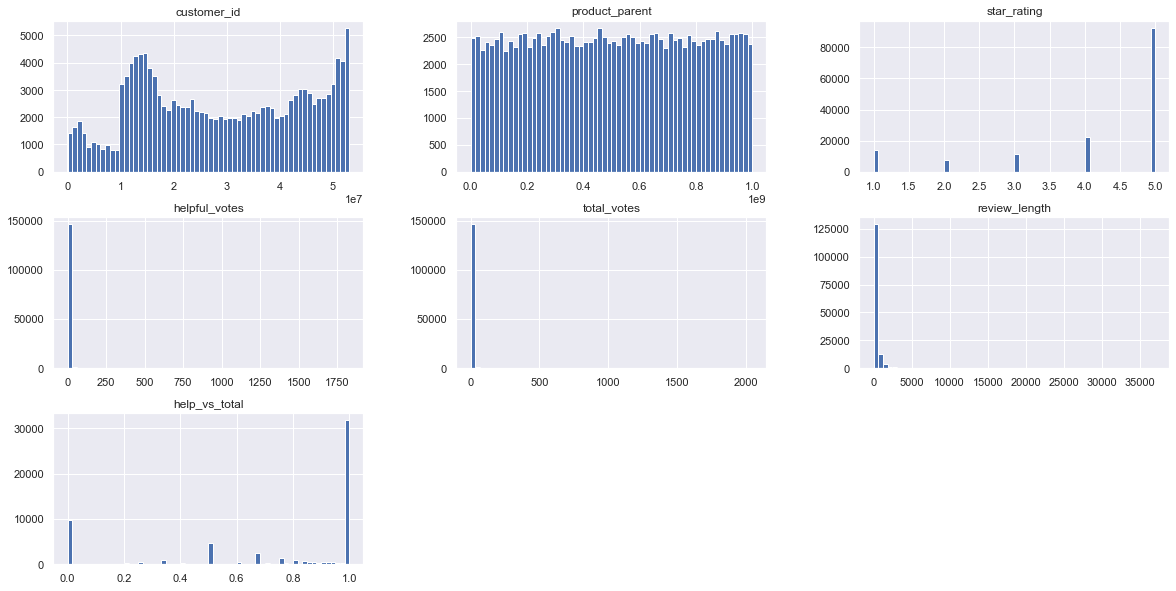

In [46]:
df_original.hist(bins=60, figsize=(20,10))

## Data Visualization

Random sampling to 50000 samples

In [47]:
df_subset = df_original.sample(n=50000,  random_state=42)

### Creating a filter 

Using data from years 2013-2015(inclusive)  based on scatter plot

In [88]:
# Standardising the review_date format
import datetime
datetime.datetime.strptime

df_subset = df_subset[(df_original['review_date']>datetime.date(2013,1,1)) & (df_original['review_date']<datetime.date(2015,12,31))]


<AxesSubplot:xlabel='review_date', ylabel='star_rating'>

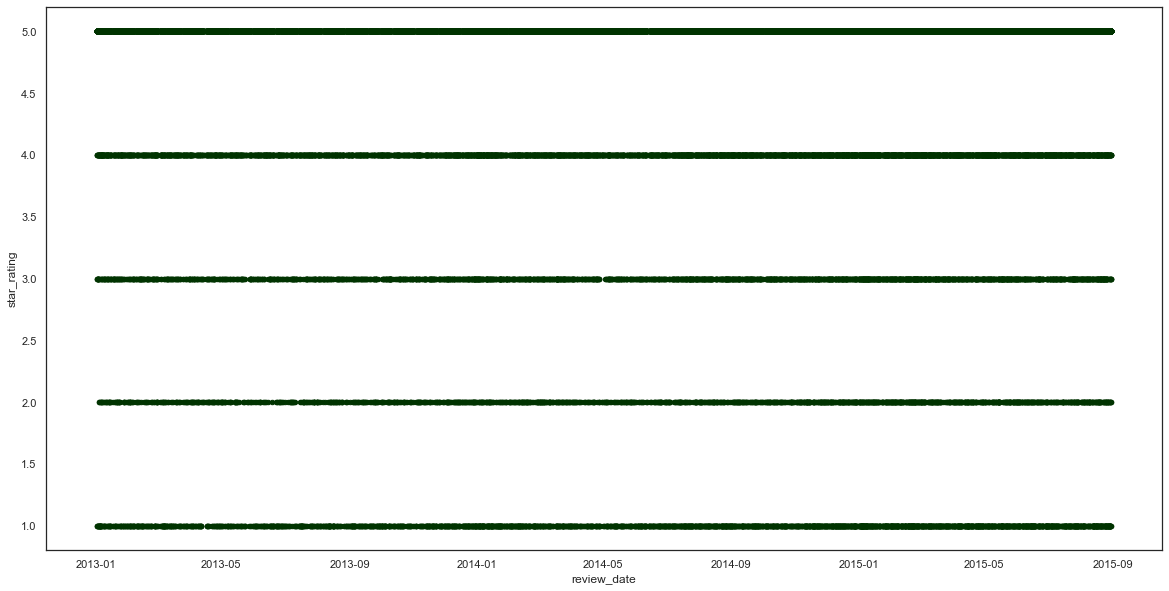

In [89]:
# df_original.plot(kind="scatter", x="customer_id", y="review_date")
df_subset[['review_date','star_rating']].plot(kind='scatter', x='review_date', color=(0,0.2,0), y='star_rating', figsize=(20,10))

(0.0, 16.0, 0.0, 550000.0)

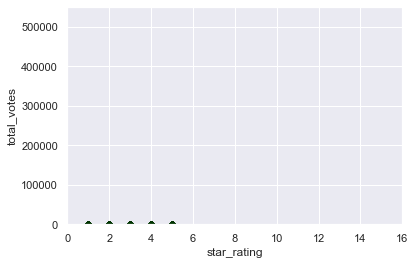

In [51]:
df_subset.plot(kind="scatter", x="star_rating", y="total_votes", color=(0,0.2,0),
             alpha=0.1)
plt.axis([0, 16, 0, 550000])

In [52]:
median = df_subset["star_rating"].median()
median

5.0

In [53]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median") 
df_numeric = df_subset[["star_rating","total_votes","helpful_votes"]]
imputer.fit(df_numeric)

SimpleImputer(strategy='median')

In [54]:
imputer.statistics_

array([5., 0., 0.])

In [55]:
df_numeric.median().values

array([5., 0., 0.])

### Ratings with the number of reviews

In [56]:
# review ratings grouped
review=pd.DataFrame(df_subset.groupby('star_rating').size().sort_values(ascending=False).rename('No of reviews').reset_index())
review.head()

,star_rating,No of reviews
0,5.0,24494
1,4.0,5431
2,1.0,3166
3,3.0,2772
4,2.0,1756


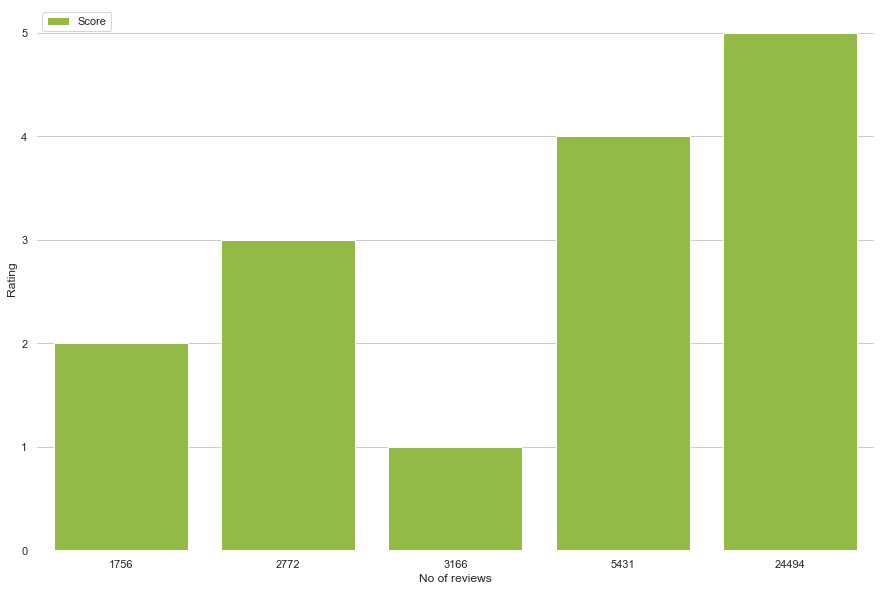

In [118]:
sns.set(style="whitegrid")

f, ax = plt.subplots(figsize=(15, 10)) 
sns.set_color_codes("pastel") 
sns.barplot(y="star_rating", x="No of reviews", data=review.iloc[:20, :10],label="Score", color="yellowgreen")
ax.legend(ncol=2, loc="upper left", frameon=True) 
ax.set(xlabel="No of reviews",ylabel="Rating") 
sns.despine(left=True, bottom=True) 
plt.show()

In [58]:
# group by customer id
df_subset.groupby('customer_id')['star_rating'].count().sort_values(ascending =False)

customer_id
34247947    7
26221913    5
12201275    5
24846840    5
53037408    4
           ..
17205781    1
17206047    1
17207079    1
17207641    1
53096127    1
Name: star_rating, Length: 37207, dtype: int64

In [59]:
# group by product id
df_subset.groupby('customer_id')['product_id'].count().sort_values(ascending =False)

customer_id
34247947    7
26221913    5
12201275    5
24846840    5
53037408    4
           ..
17205781    1
17206047    1
17207079    1
17207641    1
53096127    1
Name: product_id, Length: 37207, dtype: int64

Variance of Star ratings for different categories 

In [60]:
# Filter the data for relevant categories
vine_no = df_subset["star_rating"][df_subset['vine'] == "N"]
vine_yes = df_subset["star_rating"][df_subset['vine'] == "Y"]

verified_yes = df_subset["star_rating"][df_subset['verified_purchase'] == "Y"]
verified_no = df_subset["star_rating"][df_subset['verified_purchase'] == "N"]

long_review = df_subset["star_rating"][df_subset['review_length'] >= 20]
short_review = df_subset["star_rating"][df_subset['review_length'] < 20]
data = [df_subset["star_rating"], vine_yes, vine_no, verified_no , verified_yes, long_review, short_review ]



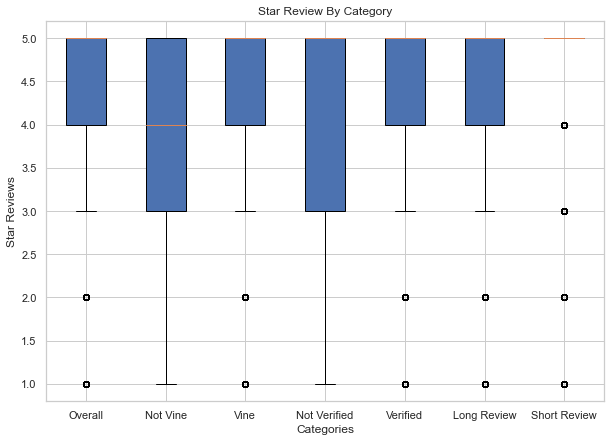

In [61]:
fig = plt.figure(figsize =(10, 7)) 

# Creating plot 
plt.boxplot(data,patch_artist=True, labels=['Overall' , 'Not Vine', 'Vine', 'Not Verified', 'Verified', 'Long Review', 'Short Review']) 
plt.title('Star Review By Category')
plt.xlabel("Categories")
plt.ylabel("Star Reviews")


# show plot 
plt.show() 

### Ratings with their count of occurance and %

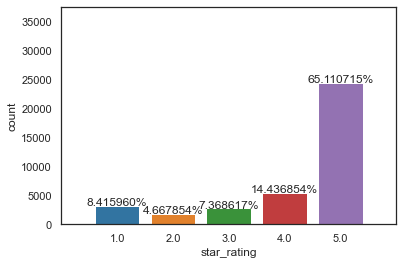

In [62]:
sns.set(style="white", palette="tab10", color_codes=True, )
ax = sns.countplot(data=df_subset,x='star_rating');
ax.set_ylim(0, len(df_subset))
ax.set_xlim(-1, 5)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 9,
            '{:%}'.format(height/float(len(df_subset))),
            ha="center") 
plt.rcParams['figure.figsize']=(10,10)
plt.show();

### observation is that in the year 2015, 61% of users who left reviews have rated 5

###  Rating distribution with its density

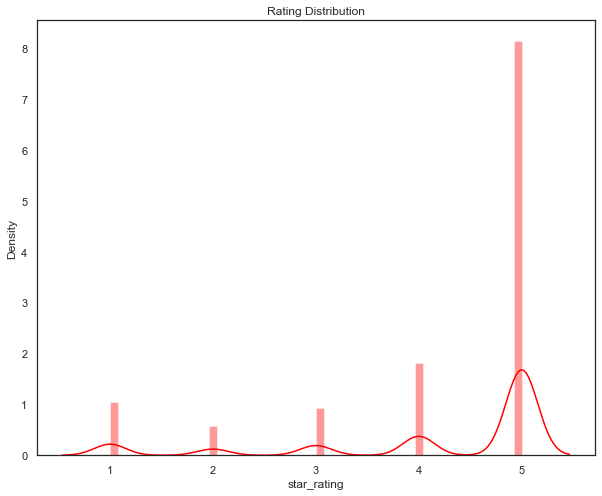

In [63]:
# Rating distribution with its density

x = df_subset['star_rating']
x=pd.to_numeric(x)

plt.figure(figsize=(10,8),)
plt.title('Rating Distribution')
sns.distplot(x,color='red');

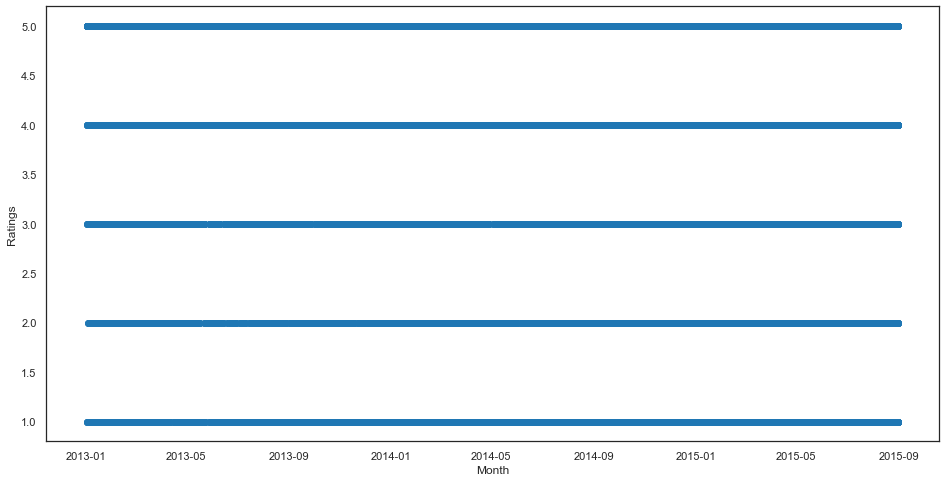

In [64]:
# Do a line chart
fig, ax = plt.subplots(figsize=(16,8))
ax.scatter(df_subset['review_date'], df_subset['star_rating'])
ax.set_xlabel('Month')
ax.set_ylabel('Ratings')
plt.show()

### Pie chart for distribution of different ratings

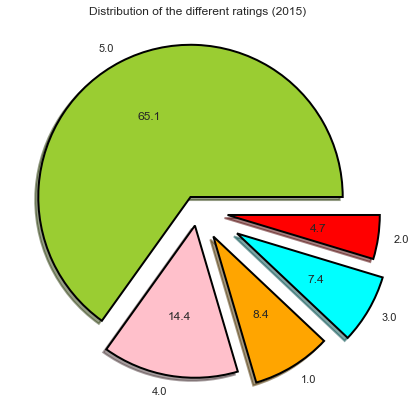

In [65]:
fig = plt.figure(figsize=(9,7))
colors = ("yellowgreen","pink","orange","cyan","red")
wp = {'linewidth':2, 'edgecolor':'black'}
tags = df_subset['star_rating'].value_counts()
explode = (0.1,0.1,0.2,0.3,0.2)
tags.plot(kind='pie', autopct='%1.1f',colors=colors, shadow=True,
          startangle=0, wedgeprops=wp, explode=explode, label='')
plt.title('Distribution of the different ratings (2015)')
plt.show()

In [ ]:
fig = plt.figure(figsize=(30,7))
sns.countplot(x="product_title",data=df_subset)

<AxesSubplot:xlabel='product_title', ylabel='count'>

### Number of ratings and mean ratings recorded for each product

In [67]:
df_ratings=pd.DataFrame({'Number of Rating':df_subset.groupby('product_id').count()['star_rating'], 'Mean Rating':df_subset.groupby('product_id').mean()['star_rating']})

In [119]:
df_ratings['Number of Rating'].value_counts()

1     23728
2      2932
3       906
4       389
5       197
6       107
7        67
8        38
9        26
10       17
11       12
12       11
15        6
17        5
13        4
16        4
14        4
23        2
18        2
19        2
25        1
27        1
28        1
39        1
31        1
26        1
42        1
Name: Number of Rating, dtype: int64

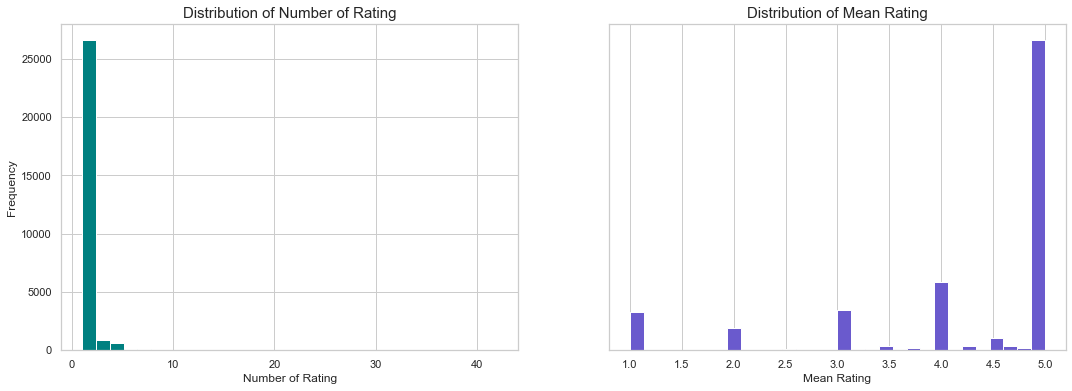

In [120]:
# Visualizing number of ratings and mean ratings recorded for each product in year 2015
plt.figure(figsize=(18,6))

plt.subplot(1,2,1)
plt.hist(x='Number of Rating',data=df_ratings,bins=30,color='teal')
plt.title('Distribution of Number of Rating', fontsize=15)
plt.xlabel('Number of Rating', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

plt.subplot(1,2,2)
plt.hist(x='Mean Rating',data=df_ratings,bins=30, color='slateblue')
plt.title('Distribution of Mean Rating', fontsize=15)
plt.xlabel('Mean Rating', fontsize=12)
plt.yticks([])
plt.show()

### Visualizing a scatter plot to observe the relationship between Number of Rating and Mean Rating.

<Figure size 576x432 with 0 Axes>

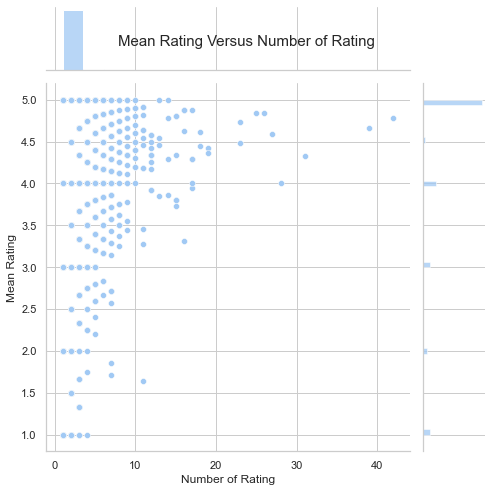

In [121]:
plt.figure(figsize=(8,6))
sns.jointplot(x='Number of Rating', y='Mean Rating',data=df_ratings,color='b', height=7)
plt.suptitle('Mean Rating Versus Number of Rating', fontsize=15, y=0.92)

plt.show()

#### The mean rating for all the products is approximately 4.01 on a scale of 5

In [122]:
df_ratings['Mean Rating'].mean()

4.215860103436374

## Testing out the one hot encoder function with product_id column

In [123]:
df_subset['product_id'].value_counts()

B00DS842HS    42
B003L1ZYYM    39
B00BGA9WK2    31
B003EM8008    28
B0012S4APK    27
              ..
B004VLVRRE     1
B004K9OCF6     1
B007KAYUAE     1
B00170DC6Q     1
B000EJRAD2     1
Name: product_id, Length: 28466, dtype: int64

In [73]:
df_cat_encoder = df_subset[['product_id']]
df_cat_encoder

,product_id
49123,B001RPT6O8
146362,B00634MLMW
70477,B007S6PT2S
77743,B0000VLPSA
105137,B000O5DI3W
...,...
33991,B00DS842HS
51928,B00845LR4G
51023,B00RAZ9QNU
93328,B001CQG618


### Sklearn

In [74]:
from sklearn.preprocessing import OneHotEncoder  
cat_encoder = OneHotEncoder(sparse=False) # Alternatively, you can set sparse=False when creating the OneHotEncoder
df_cat_hot = cat_encoder.fit_transform(df_cat_encoder)
df_cat_hot

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [75]:
cat_encoder.categories_

[array(['0511189877', '0972683275', '1223070743', ..., 'B0139XZ72K',
        'B013D0SMH6', 'B013SOAVQW'], dtype=object)]

In [76]:
cat_encoder

OneHotEncoder(sparse=False)

### Building a word count vector for each review

In [ ]:
# df_subset['review_body'].astype('str')
df_subset['review'] = df_subset['review_body'].astype('str')
df_subset.head(1000)

### Removing star_rating = 3 as its nuetral

In [78]:
df_subset_rating_formatted = df_subset[df_subset['star_rating']!= 3]


### Creating a new column sentiment, if the rating is > 3 then (+1) & if < 3 then (-1)

In [79]:
# # display(df_subset['review_body'].iloc[100])
# df_formatted =df_subset.replace(".", ",") for word in df_subset
# Function created to get rid of punctuations in the review body

# def remove_punc(text):
#     import string
#     return text.translate(str.maketrans('','',string.punctuation))

# # Applying the function to review_body
# review_body_formatted = df_subset_rating_formatted['review'].apply(remove_punc)


from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
df_subset_rating_formatted['word_count'] = vectorizer.fit(df_subset['review'])

### word_count column will eventually be my feature vector or indipendent vector and I will create a new column called sentiment will be my dependent vector [>3 then (+1) & if <3 then (-1)]

In [ ]:
df_subset_rating_formatted['sentiment'] = df_subset_rating_formatted['star_rating'].apply(lambda star_rating : +1 if 
                                                                                          star_rating > 3 else -1)
df_subset_rating_formatted.head()

### Correlation 

In [124]:
corr_matrix = df_subset_rating_formatted.corr()
corr_matrix


,customer_id,product_parent,star_rating,helpful_votes,total_votes,review_length,help_vs_total,sentiment
customer_id,1.000000,-6.494628e-03,-0.006631,0.012606,0.009148,0.066243,0.059652,-9.804865e-03
product_parent,-0.006495,1.000000e+00,-0.001911,-0.003865,-0.004553,0.002112,-0.001820,-1.685426e-07
star_rating,-0.006631,-1.911080e-03,1.000000,-0.048207,-0.082648,-0.076418,0.171470,9.491320e-01
helpful_votes,0.012606,-3.864650e-03,-0.048207,1.000000,0.975389,0.206402,0.100311,-4.848852e-02
total_votes,0.009148,-4.553491e-03,-0.082648,0.975389,1.000000,0.215349,0.034982,-8.250024e-02
review_length,0.066243,2.112328e-03,-0.076418,0.206402,0.215349,1.000000,0.081999,-6.272016e-02
help_vs_total,0.059652,-1.819688e-03,0.171470,0.100311,0.034982,0.081999,1.000000,1.726045e-01
sentiment,-0.009805,-1.685426e-07,0.949132,-0.048489,-0.082500,-0.062720,0.172605,1.000000e+00


In [125]:
corr_matrix["star_rating"].sort_values(ascending=False)

star_rating       1.000000
sentiment         0.949132
help_vs_total     0.171470
product_parent   -0.001911
customer_id      -0.006631
helpful_votes    -0.048207
review_length    -0.076418
total_votes      -0.082648
Name: star_rating, dtype: float64

### Plotting

array([[<AxesSubplot:xlabel='star_rating', ylabel='star_rating'>,
        <AxesSubplot:xlabel='customer_id', ylabel='star_rating'>,
        <AxesSubplot:xlabel='product_parent', ylabel='star_rating'>,
        <AxesSubplot:xlabel='helpful_votes', ylabel='star_rating'>,
        <AxesSubplot:xlabel='total_votes', ylabel='star_rating'>],
       [<AxesSubplot:xlabel='star_rating', ylabel='customer_id'>,
        <AxesSubplot:xlabel='customer_id', ylabel='customer_id'>,
        <AxesSubplot:xlabel='product_parent', ylabel='customer_id'>,
        <AxesSubplot:xlabel='helpful_votes', ylabel='customer_id'>,
        <AxesSubplot:xlabel='total_votes', ylabel='customer_id'>],
       [<AxesSubplot:xlabel='star_rating', ylabel='product_parent'>,
        <AxesSubplot:xlabel='customer_id', ylabel='product_parent'>,
        <AxesSubplot:xlabel='product_parent', ylabel='product_parent'>,
        <AxesSubplot:xlabel='helpful_votes', ylabel='product_parent'>,
        <AxesSubplot:xlabel='total_votes', ylab

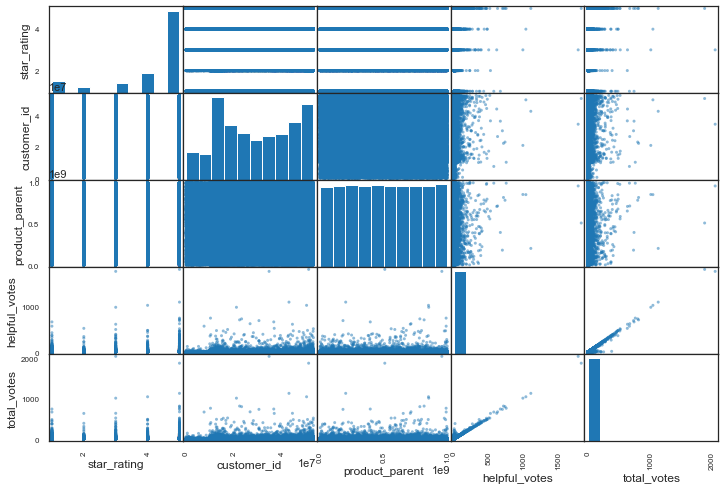

In [84]:
from pandas.plotting import scatter_matrix

attributes = ["star_rating", "customer_id", "product_parent",
              "helpful_votes", "total_votes"]
scatter_matrix(df_original[attributes], figsize=(12, 8))

(0.0, 16.0, 0.0, 550000.0)

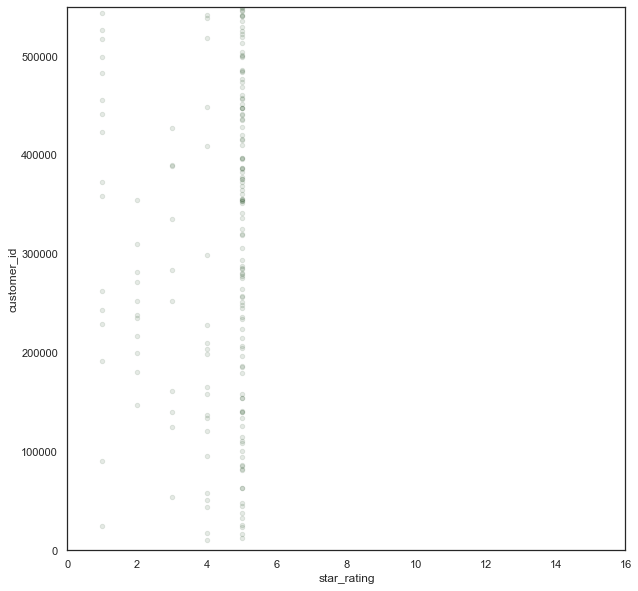

In [85]:
data_set_buffer.plot(kind="scatter", x="star_rating", y="customer_id",color=(0,0.2,0),
             alpha=0.1)
plt.axis([0, 16, 0, 550000])

(0.0, 16.0, 0.0, 550000.0)

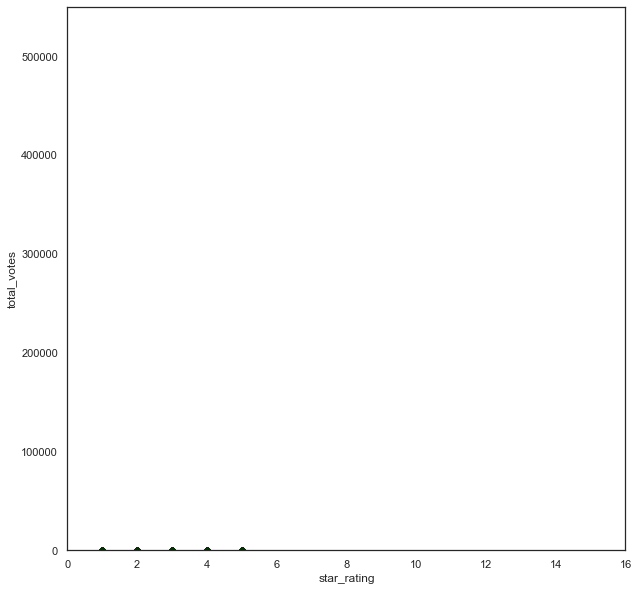

In [86]:
data_set_buffer.plot(kind="scatter", x="star_rating", y="total_votes", color=(0,0.2,0),
             alpha=0.1)
plt.axis([0, 16, 0, 550000])

# Feature selection with correlation matrix

In [202]:
corr_matrix = df_subset_rating_formatted.corr()
corr_matrix

,customer_id,product_parent,star_rating,helpful_votes,total_votes,review_length,sentiment
customer_id,1.000000,-6.494628e-03,-0.006631,0.012606,0.009148,0.066243,-9.804865e-03
product_parent,-0.006495,1.000000e+00,-0.001911,-0.003865,-0.004553,0.002112,-1.685426e-07
star_rating,-0.006631,-1.911080e-03,1.000000,-0.048207,-0.082648,-0.076418,9.491320e-01
helpful_votes,0.012606,-3.864650e-03,-0.048207,1.000000,0.975389,0.206402,-4.848852e-02
total_votes,0.009148,-4.553491e-03,-0.082648,0.975389,1.000000,0.215349,-8.250024e-02
review_length,0.066243,2.112328e-03,-0.076418,0.206402,0.215349,1.000000,-6.272016e-02
sentiment,-0.009805,-1.685426e-07,0.949132,-0.048489,-0.082500,-0.062720,1.000000e+00


In [206]:
corr_matrix["star_rating"].sort_values(ascending=False)

star_rating       1.000000
sentiment         0.949132
product_parent   -0.001911
customer_id      -0.006631
helpful_votes    -0.048207
review_length    -0.076418
total_votes      -0.082648
Name: star_rating, dtype: float64

<AxesSubplot:>

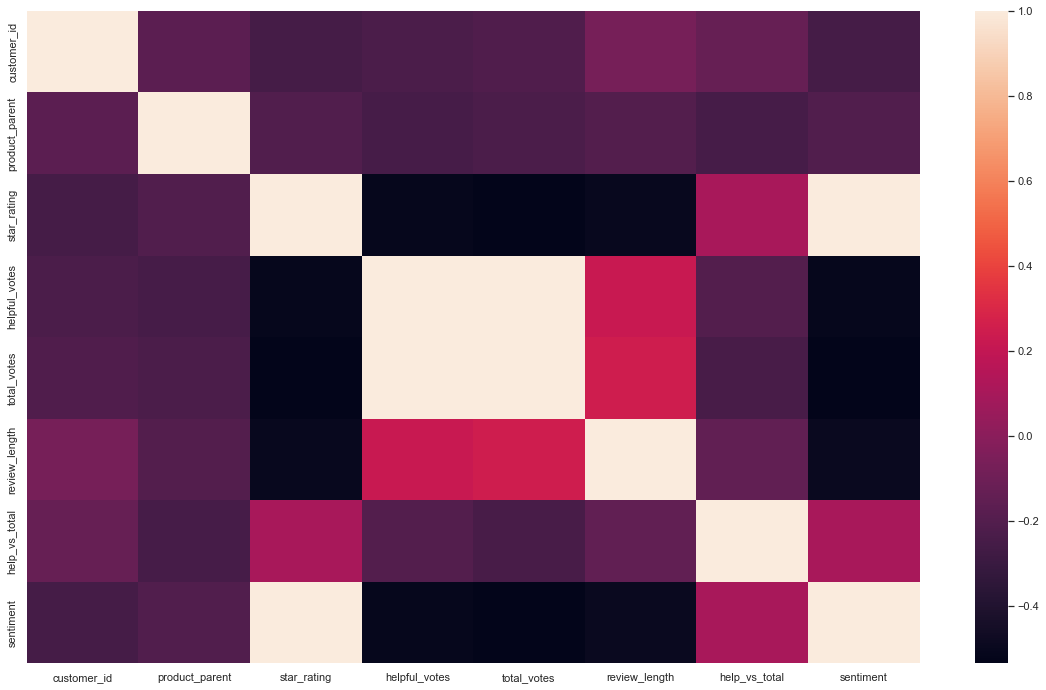

In [126]:
plt.figure(figsize = (20,12))
sns.heatmap(corr_matrix.corr())

In [207]:
top_5_corr = corr_matrix.corr()['star_rating'].sort_values().head(5).index
top_5_corr

Index(['total_votes', 'helpful_votes', 'review_length', 'customer_id',
       'product_parent'],
      dtype='object')

In [142]:
df_subset_rating_formatted = df_subset_rating_formatted.drop("help_vs_total", axis=1)
df_subset_rating_formatted = df_subset_rating_formatted.drop("review", axis=1)
df_subset_rating_formatted = df_subset_rating_formatted.drop("product_title", axis=1)
df_subset_rating_formatted = df_subset_rating_formatted.drop("vine", axis=1)
df_subset_rating_formatted = df_subset_rating_formatted.drop("verified_purchase", axis=1)
df_subset_rating_formatted = df_subset_rating_formatted.drop("review_headline", axis=1)
df_subset_rating_formatted = df_subset_rating_formatted.drop("review_date", axis=1)
df_subset_rating_formatted = df_subset_rating_formatted.drop("product_id", axis=1)
df_subset_rating_formatted = df_subset_rating_formatted.drop("word_count", axis=1)

In [143]:
df_subset_rating_formatted.isna().sum()

customer_id       0
product_parent    0
star_rating       0
helpful_votes     0
total_votes       0
review_body       0
review_length     0
sentiment         0
dtype: int64

In [177]:
df_subset_rating_formatted['sentiment'].value_counts()

 1    29925
-1     4922
Name: sentiment, dtype: int64

In [144]:
df_subset_rating_formatted.head()

,customer_id,product_parent,star_rating,helpful_votes,total_votes,review_body,review_length,sentiment
49123,24716884,977768491,5.0,0.0,0.0,Delicious!,10,1
70477,29361288,868790931,5.0,1.0,1.0,Great color and consistent throughout the piec...,151,1
77743,52368765,253098875,4.0,0.0,0.0,It seems to work good for our need. It is easy...,102,1
105137,37867253,389448806,5.0,0.0,0.0,My dogs wait at the door for their morning med...,122,1
77710,47537614,182116429,5.0,1.0,2.0,Our grandkids love this!,24,1


## Preparing the text for sentiment analyses

In [190]:
for i in range(5):
    print(df_subset_rating_formatted['review_body'].iloc[i],"\n")

delicious 

great color consistent throughout piece glass thick sharp seams well made piece delivered described 

seems work good need easy install used shorter screws supplied 

dogs wait door morning meds love pill pockets best dog treat ive ever purchased 

grandkids love 



In [169]:
# Function to perform lowercase conversion,then we removed punctuations,then we performed tokeniozation
# and removed stop words.

def data_processing(text):
    text = text.lower()
    text = re.sub(r'[^\w\s]','',text)
    text_tokens = word_tokenize(text)
    filtered_text = [w for w in text_tokens if not w in stop_words]
    return " ".join(filtered_text)

In [170]:
# Applying data_processing function on the review_body
df_subset_rating_formatted.review_body = df_subset_rating_formatted['review_body'].apply(data_processing)

In [171]:
# Used a stemmer to root/base words in the review_body column
stemmer = PorterStemmer()
def stemming(data):
    text = [stemmer.stem(word) for word in data]
    return data

In [172]:
# Applying stemming to the processed data in review_body
df_subset_rating_formatted['review_body'] = df_subset_rating_formatted['review_body'].apply(lambda x: stemming(x))

In [175]:
# Checking if the functions worked and the data has been processed as intended
for i in range(5):
    print(df_subset_rating_formatted['review_body'].iloc[i],"\n")

delicious 

great color consistent throughout piece glass thick sharp seams well made piece delivered described 

seems work good need easy install used shorter screws supplied 

dogs wait door morning meds love pill pockets best dog treat ive ever purchased 

grandkids love 



In [180]:
pos_reviews = df_subset_rating_formatted[df_subset_rating_formatted.sentiment == 1]
pos_reviews.head()

,customer_id,product_parent,star_rating,helpful_votes,total_votes,review_body,review_length,sentiment
49123,24716884,977768491,5.0,0.0,0.0,delicious,10,1
70477,29361288,868790931,5.0,1.0,1.0,great color consistent throughout piece glass ...,151,1
77743,52368765,253098875,4.0,0.0,0.0,seems work good need easy install used shorter...,102,1
105137,37867253,389448806,5.0,0.0,0.0,dogs wait door morning meds love pill pockets ...,122,1
77710,47537614,182116429,5.0,1.0,2.0,grandkids love,24,1


## Splitting data into x(review_body) and y(sentiment) axis

In [192]:
X = df_subset_rating_formatted['review_body']
Y = df_subset_rating_formatted['sentiment']

In [194]:
# Vectorising the data before moving to model building
cv = CountVectorizer()
X = cv.fit_transform(df_subset_rating_formatted['review_body'])

In [195]:
# Splitting the data into test and train set with test set as 20% of the dataset
x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size=0.2, random_state=42)

In [196]:
# Checking the size of the train and test data
print("Size of x_train: ",(x_train.shape))
print("Size of y_train: ",(y_train.shape))
print("Size of x_test: ",(x_test.shape))
print("Size of y_test: ",(y_test.shape))

Size of x_train:  (27877, 43263)
Size of y_train:  (27877,)
Size of x_test:  (6970, 43263)
Size of y_test:  (6970,)


In [197]:
# Importing necessary libraries from sklearen
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [198]:
# Building the ML sentiomental analyses model
# Training the data on the logistic regression model
# Including the x train and y train in the LR model
# Predict values of the test data
# Calculating the accuracy of the model
# Displaying the accuracy
logreg = LogisticRegression()
logreg.fit(x_train, y_train)
logreg_pred = logreg.predict(x_test)
logreg_acc = accuracy_score(logreg_pred, y_test)
print("Test accuracy: {:.2f}%".format(logreg_acc*100))

Test accuracy: 91.38%


In [199]:
# Confusion matrix and classification report
print(confusion_matrix(y_test, logreg_pred))
print("\n")
print(classification_report(y_test, logreg_pred))

[[ 586  416]
 [ 185 5783]]


              precision    recall  f1-score   support

          -1       0.76      0.58      0.66      1002
           1       0.93      0.97      0.95      5968

    accuracy                           0.91      6970
   macro avg       0.85      0.78      0.81      6970
weighted avg       0.91      0.91      0.91      6970



In [200]:
# Training the data on Multinominal Naive Bayes Model
# Fitting the x and y train on the model
# Predict values of the test data
# Calculating the accuracy of the model
# Displaying the accuracy
mnb = MultinomialNB()
mnb.fit(x_train, y_train)
mnb_pred = mnb.predict(x_test)
mnb_acc = accuracy_score(mnb_pred, y_test)
print("Test accuracy: {:.2f}%".format(mnb_acc*100))

Test accuracy: 89.73%


In [201]:
# Displaying the 
print(confusion_matrix(y_test, mnb_pred))
print("\n")
print(classification_report(y_test, mnb_pred))

[[ 411  591]
 [ 125 5843]]


              precision    recall  f1-score   support

          -1       0.77      0.41      0.53      1002
           1       0.91      0.98      0.94      5968

    accuracy                           0.90      6970
   macro avg       0.84      0.69      0.74      6970
weighted avg       0.89      0.90      0.88      6970

